# Heart Attack

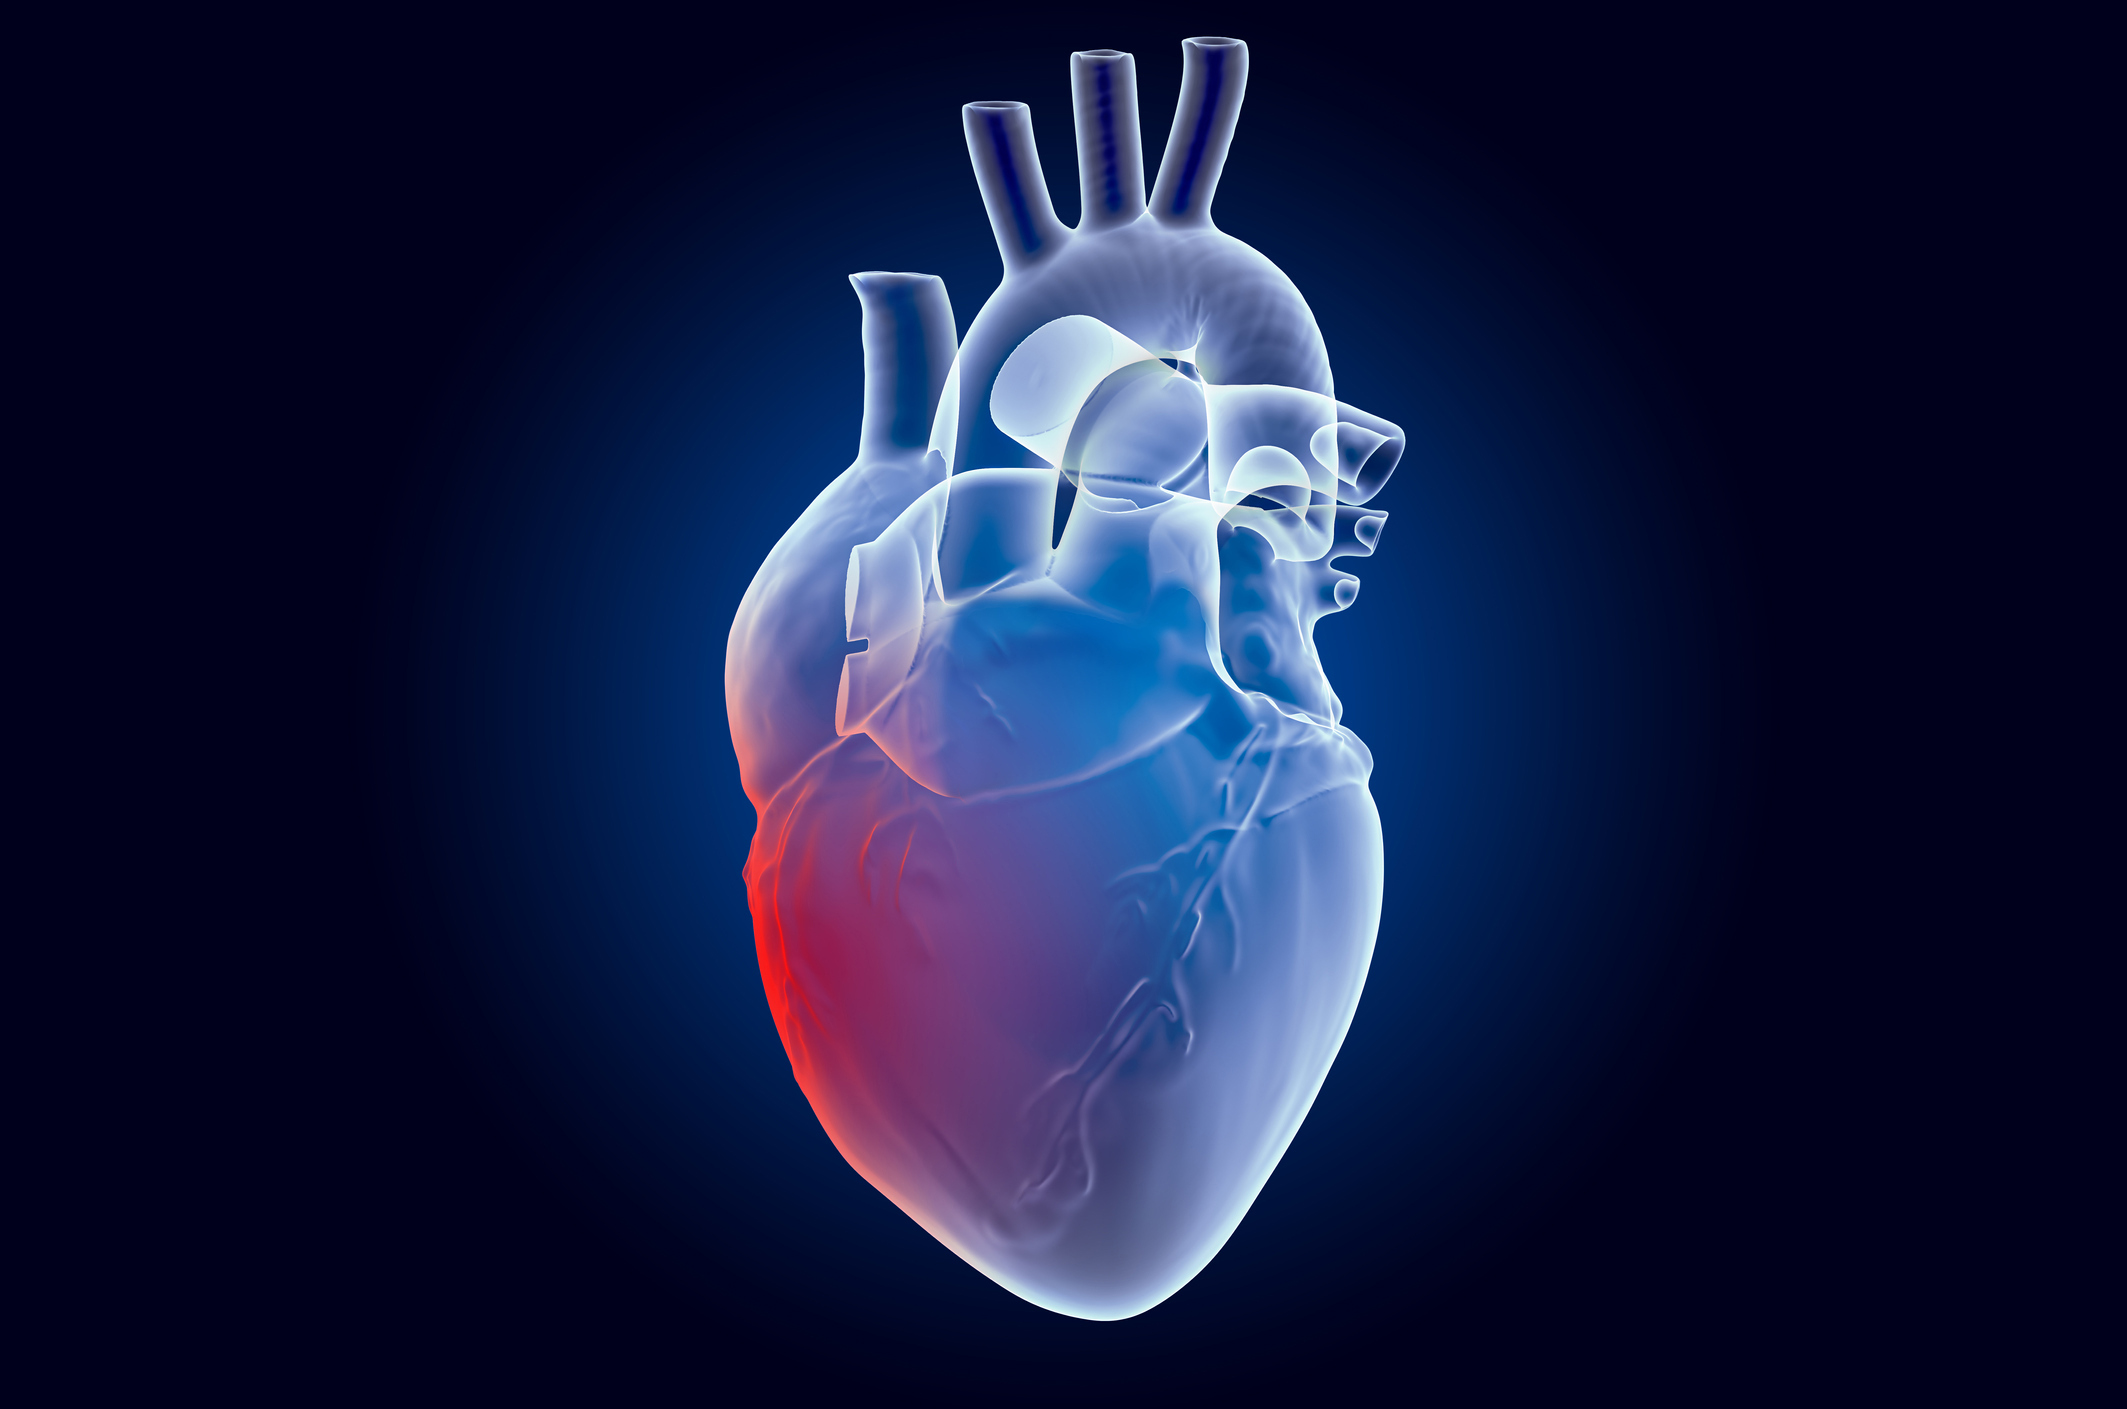

In [1]:
import pyspark 
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import col, sum
import pylab as pl
import numpy as np
from pyspark_dist_explore import hist
import pyspark.pandas as ps
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# increase font size of plot titles
sns.set_palette("pastel")
sns.set(font_scale=1.5)

In [3]:
#create a spark session 
spark=SparkSession.builder.appName("Practice").getOrCreate()

In [4]:
# read a dataset 
pdf=spark.read.csv(r"C:\Users\HP\Downloads\archive\heart.csv", header=True, inferSchema=True)


In [5]:
# Afficher les colonnes du DataFrame
pdf.columns

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

About this dataset
 - Age : Age of the patient
 - Sex : Sex of the patient
 - exang: exercise induced angina (1 = yes; 0 = no)
 - ca: number of major vessels (0-3)
 - cp : Chest Pain type chest pain type
       - Value 1: typical angina
       - Value 2: atypical angina
       - Value 3: non-anginal pain
       - Value 4: asymptomatic
 - trtbps : resting blood pressure (in mm Hg)
 - chol : cholestoral in mg/dl fetched via BMI sensor
 - fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 - rest_ecg : resting electrocardiographic results
        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
 - thalach : maximum heart rate achieved

 - target : 0= less chance of heart attack 1= more chance of heart attack n

In [6]:
pdf.show()

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
| 63|  1|  3|   145| 233|  1|      0|     150|   0|    2.3|  0|  0|    1|     1|
| 37|  1|  2|   130| 250|  0|      1|     187|   0|    3.5|  0|  0|    2|     1|
| 41|  0|  1|   130| 204|  0|      0|     172|   0|    1.4|  2|  0|    2|     1|
| 56|  1|  1|   120| 236|  0|      1|     178|   0|    0.8|  2|  0|    2|     1|
| 57|  0|  0|   120| 354|  0|      1|     163|   1|    0.6|  2|  0|    2|     1|
| 57|  1|  0|   140| 192|  0|      1|     148|   0|    0.4|  1|  0|    1|     1|
| 56|  0|  1|   140| 294|  0|      0|     153|   0|    1.3|  1|  0|    2|     1|
| 44|  1|  1|   120| 263|  0|      1|     173|   0|    0.0|  2|  0|    3|     1|
| 52|  1|  2|   172| 199|  1|      1|     162|   0|    0.5|  2|  0|    3|     1|
| 57|  1|  2|   150| 168|  0

In [7]:
# for more information we use .printSchema it s like .info()
pdf.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trtbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalachh: integer (nullable = true)
 |-- exng: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slp: integer (nullable = true)
 |-- caa: integer (nullable = true)
 |-- thall: integer (nullable = true)
 |-- output: integer (nullable = true)



In [8]:
# types of columns 
pdf.dtypes

[('age', 'int'),
 ('sex', 'int'),
 ('cp', 'int'),
 ('trtbps', 'int'),
 ('chol', 'int'),
 ('fbs', 'int'),
 ('restecg', 'int'),
 ('thalachh', 'int'),
 ('exng', 'int'),
 ('oldpeak', 'double'),
 ('slp', 'int'),
 ('caa', 'int'),
 ('thall', 'int'),
 ('output', 'int')]

### counting the number of rows in the dataframe

In [9]:
pdf.count()

303

In [10]:
pdf.select("age", "cp","trtbps","chol","thalachh").describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|               age|                cp|            trtbps|              chol|          thalachh|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|               303|               303|               303|               303|               303|
|   mean|54.366336633663366| 0.966996699669967|131.62376237623764|246.26402640264027|149.64686468646866|
| stddev|  9.08210098983786|1.0320524894832983|  17.5381428135171| 51.83075098793005| 22.90516111491409|
|    min|                29|                 0|                94|               126|                71|
|    max|                77|                 3|               200|               564|               202|
+-------+------------------+------------------+------------------+------------------+------------------+



In [11]:
pdf.select("oldpeak","slp","caa","thall").describe().show()

+-------+------------------+------------------+------------------+------------------+
|summary|           oldpeak|               slp|               caa|             thall|
+-------+------------------+------------------+------------------+------------------+
|  count|               303|               303|               303|               303|
|   mean|1.0396039603960396|1.3993399339933994|0.7293729372937293|2.3135313531353137|
| stddev|1.1610750220686346|0.6162261453459622|1.0226063649693276|0.6122765072781408|
|    min|               0.0|                 0|                 0|                 0|
|    max|               6.2|                 2|                 4|                 3|
+-------+------------------+------------------+------------------+------------------+



In [12]:
sex = pdf.groupBy("sex").count().orderBy(col("count").desc())
sex.show()

+---+-----+
|sex|count|
+---+-----+
|  1|  207|
|  0|   96|
+---+-----+



In [13]:
207/303

0.6831683168316832

In [14]:
96/303

0.31683168316831684

In [15]:
cp = pdf.groupBy("cp").count().orderBy(col("count").desc())
cp.show()

+---+-----+
| cp|count|
+---+-----+
|  0|  143|
|  2|   87|
|  1|   50|
|  3|   23|
+---+-----+



In [16]:
# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
fbs = pdf.groupBy("fbs").count().orderBy(col("count").desc())
fbs.show()

+---+-----+
|fbs|count|
+---+-----+
|  0|  258|
|  1|   45|
+---+-----+



In [17]:
# target : 0= less chance of heart attack 1= more chance of heart attack n
output = pdf.groupBy("output").count().orderBy(col("count").desc())
output.show()

+------+-----+
|output|count|
+------+-----+
|     1|  165|
|     0|  138|
+------+-----+



## Missing values

In [18]:
# Compter le nombre de valeurs nulles dans chaque colonne
null_counts = pdf.agg(*[sum(col(c).isNull().cast("int")).alias(c) for c in pdf.columns])
null_counts.show()

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|  0|  0|  0|     0|   0|  0|      0|       0|   0|      0|  0|  0|    0|     0|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+



# Mlib

In [19]:
#import required libraries
import pyspark.ml
from pyspark.ml.feature import VectorAssembler,StringIndexer
from pyspark.ml.classification import LogisticRegression,DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics


from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.util import MLUtils
from pyspark.mllib.evaluation import MulticlassMetrics

In [20]:
dir(pyspark.ml)

['Estimator',
 'Model',
 'Pipeline',
 'PipelineModel',
 'PredictionModel',
 'Predictor',
 'Transformer',
 'UnaryTransformer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'classification',
 'clustering',
 'common',
 'evaluation',
 'feature',
 'fpm',
 'image',
 'linalg',
 'param',
 'pipeline',
 'recommendation',
 'regression',
 'stat',
 'tree',
 'tuning',
 'util',
 'wrapper']

In [21]:
pdf.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trtbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalachh: integer (nullable = true)
 |-- exng: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slp: integer (nullable = true)
 |-- caa: integer (nullable = true)
 |-- thall: integer (nullable = true)
 |-- output: integer (nullable = true)



In [22]:
required_features = ['age','sex', 'cp', 'trtbps', 'chol','restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall','output']

In [23]:
# VectorAsm
vec_assembler = VectorAssembler(inputCols=required_features,outputCol='features')

In [24]:
vec_df = vec_assembler.transform(pdf)

In [25]:
vec_df.select("features").show()

+--------------------+
|            features|
+--------------------+
|[63.0,1.0,3.0,145...|
|[37.0,1.0,2.0,130...|
|[41.0,0.0,1.0,130...|
|[56.0,1.0,1.0,120...|
|[57.0,0.0,0.0,120...|
|[57.0,1.0,0.0,140...|
|[56.0,0.0,1.0,140...|
|[44.0,1.0,1.0,120...|
|[52.0,1.0,2.0,172...|
|[57.0,1.0,2.0,150...|
|[54.0,1.0,0.0,140...|
|[48.0,0.0,2.0,130...|
|[49.0,1.0,1.0,130...|
|[64.0,1.0,3.0,110...|
|[58.0,0.0,3.0,150...|
|[50.0,0.0,2.0,120...|
|[58.0,0.0,2.0,120...|
|[66.0,0.0,3.0,150...|
|[43.0,1.0,0.0,150...|
|[69.0,0.0,3.0,140...|
+--------------------+
only showing top 20 rows



In [26]:
vec_df.show()

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+--------------------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|            features|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+--------------------+
| 63|  1|  3|   145| 233|  1|      0|     150|   0|    2.3|  0|  0|    1|     1|[63.0,1.0,3.0,145...|
| 37|  1|  2|   130| 250|  0|      1|     187|   0|    3.5|  0|  0|    2|     1|[37.0,1.0,2.0,130...|
| 41|  0|  1|   130| 204|  0|      0|     172|   0|    1.4|  2|  0|    2|     1|[41.0,0.0,1.0,130...|
| 56|  1|  1|   120| 236|  0|      1|     178|   0|    0.8|  2|  0|    2|     1|[56.0,1.0,1.0,120...|
| 57|  0|  0|   120| 354|  0|      1|     163|   1|    0.6|  2|  0|    2|     1|[57.0,0.0,0.0,120...|
| 57|  1|  0|   140| 192|  0|      1|     148|   0|    0.4|  1|  0|    1|     1|[57.0,1.0,0.0,140...|
| 56|  0|  1|   140| 294|  0|      0|     153|   0|    1.3|  1|  0|    2|     1|[5

In [27]:
vec_df = vec_df.select(["output", "features"])

In [28]:
vec_df.show()

+------+--------------------+
|output|            features|
+------+--------------------+
|     1|[63.0,1.0,3.0,145...|
|     1|[37.0,1.0,2.0,130...|
|     1|[41.0,0.0,1.0,130...|
|     1|[56.0,1.0,1.0,120...|
|     1|[57.0,0.0,0.0,120...|
|     1|[57.0,1.0,0.0,140...|
|     1|[56.0,0.0,1.0,140...|
|     1|[44.0,1.0,1.0,120...|
|     1|[52.0,1.0,2.0,172...|
|     1|[57.0,1.0,2.0,150...|
|     1|[54.0,1.0,0.0,140...|
|     1|[48.0,0.0,2.0,130...|
|     1|[49.0,1.0,1.0,130...|
|     1|[64.0,1.0,3.0,110...|
|     1|[58.0,0.0,3.0,150...|
|     1|[50.0,0.0,2.0,120...|
|     1|[58.0,0.0,2.0,120...|
|     1|[66.0,0.0,3.0,150...|
|     1|[43.0,1.0,0.0,150...|
|     1|[69.0,0.0,3.0,140...|
+------+--------------------+
only showing top 20 rows



# Train,Test Split

In [29]:
train_df,test_df = vec_df.randomSplit([0.7,0.3])

In [30]:
print(f"Train set length : {train_df.count()} records")

Train set length : 222 records


In [31]:
print(f"Test set length : {test_df.count()} records")

Test set length : 81 records


In [32]:
test_df.show()

+------+--------------------+
|output|            features|
+------+--------------------+
|     0|(13,[0,3,4,6,8,10...|
|     0|(13,[0,3,4,6,8,10...|
|     0|[40.0,1.0,0.0,110...|
|     0|[40.0,1.0,0.0,152...|
|     0|[43.0,1.0,0.0,132...|
|     0|[44.0,1.0,0.0,112...|
|     0|[45.0,1.0,3.0,110...|
|     0|[46.0,1.0,0.0,120...|
|     0|[48.0,1.0,0.0,130...|
|     0|[49.0,1.0,2.0,120...|
|     0|[50.0,1.0,0.0,144...|
|     0|[51.0,1.0,0.0,140...|
|     0|[52.0,1.0,0.0,128...|
|     0|[53.0,1.0,0.0,123...|
|     0|[54.0,1.0,0.0,110...|
|     0|[54.0,1.0,0.0,124...|
|     0|[55.0,0.0,0.0,128...|
|     0|[55.0,1.0,0.0,140...|
|     0|[57.0,1.0,0.0,110...|
|     0|[57.0,1.0,0.0,150...|
+------+--------------------+
only showing top 20 rows



In [33]:
# Create logistic regression object
lr = LogisticRegression(featuresCol="features", labelCol="output")

In [34]:
train_df.show()

+------+--------------------+
|output|            features|
+------+--------------------+
|     0|(13,[0,1,3,4,6,9,...|
|     0|(13,[0,3,4,6,9,11...|
|     0|[35.0,1.0,0.0,120...|
|     0|[35.0,1.0,0.0,126...|
|     0|[38.0,1.0,3.0,120...|
|     0|[39.0,1.0,0.0,118...|
|     0|[42.0,1.0,0.0,136...|
|     0|[43.0,0.0,0.0,132...|
|     0|[43.0,1.0,0.0,120...|
|     0|[44.0,1.0,0.0,110...|
|     0|[44.0,1.0,0.0,120...|
|     0|[45.0,1.0,0.0,142...|
|     0|[46.0,1.0,0.0,140...|
|     0|[46.0,1.0,2.0,150...|
|     0|[47.0,1.0,0.0,110...|
|     0|[47.0,1.0,2.0,108...|
|     0|[48.0,1.0,0.0,124...|
|     0|[48.0,1.0,1.0,110...|
|     0|[49.0,1.0,2.0,118...|
|     0|[50.0,1.0,0.0,150...|
+------+--------------------+
only showing top 20 rows



In [35]:
vec_df.show()

+------+--------------------+
|output|            features|
+------+--------------------+
|     1|[63.0,1.0,3.0,145...|
|     1|[37.0,1.0,2.0,130...|
|     1|[41.0,0.0,1.0,130...|
|     1|[56.0,1.0,1.0,120...|
|     1|[57.0,0.0,0.0,120...|
|     1|[57.0,1.0,0.0,140...|
|     1|[56.0,0.0,1.0,140...|
|     1|[44.0,1.0,1.0,120...|
|     1|[52.0,1.0,2.0,172...|
|     1|[57.0,1.0,2.0,150...|
|     1|[54.0,1.0,0.0,140...|
|     1|[48.0,0.0,2.0,130...|
|     1|[49.0,1.0,1.0,130...|
|     1|[64.0,1.0,3.0,110...|
|     1|[58.0,0.0,3.0,150...|
|     1|[50.0,0.0,2.0,120...|
|     1|[58.0,0.0,2.0,120...|
|     1|[66.0,0.0,3.0,150...|
|     1|[43.0,1.0,0.0,150...|
|     1|[69.0,0.0,3.0,140...|
+------+--------------------+
only showing top 20 rows



In [36]:
lr_model = lr.fit(train_df)

In [37]:
predictions = lr_model.transform(test_df)

In [38]:
predictions.show(70)

+------+--------------------+--------------------+--------------------+----------+
|output|            features|       rawPrediction|         probability|prediction|
+------+--------------------+--------------------+--------------------+----------+
|     0|(13,[0,3,4,6,8,10...|[19.5440857293769...|[0.99999999674829...|       0.0|
|     0|(13,[0,3,4,6,8,10...|[20.7751723833554...|[0.99999999905058...|       0.0|
|     0|[40.0,1.0,0.0,110...|[19.5730091169137...|[0.99999999684099...|       0.0|
|     0|[40.0,1.0,0.0,152...|[17.9717438076910...|[0.99999998433354...|       0.0|
|     0|[43.0,1.0,0.0,132...|[20.3192368355493...|[0.99999999850215...|       0.0|
|     0|[44.0,1.0,0.0,112...|[18.3519518438130...|[0.99999998928854...|       0.0|
|     0|[45.0,1.0,3.0,110...|[17.6418611999460...|[0.99999997821101...|       0.0|
|     0|[46.0,1.0,0.0,120...|[18.6512990937354...|[0.99999999205957...|       0.0|
|     0|[48.0,1.0,0.0,130...|[19.5060204448513...|[0.99999999662212...|       0.0|
|   

# Model Evaluation

In [39]:
# How to Check For Accuracy
multi_evaluator = MulticlassClassificationEvaluator(labelCol='output',metricName='accuracy')

In [40]:
multi_evaluator.evaluate(predictions)

1.0

## Precision,F1 Score,Recall : Classification Report

In [41]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col

In [42]:
# Instantiate a MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="output", metricName="accuracy")

# Accuracy

In [43]:
# Get the accuracy
accuracy = evaluator.evaluate(predictions)
accuracy

1.0

# Precision

In [44]:
# compute precision
evaluator = MulticlassClassificationEvaluator(labelCol="output", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator.evaluate(predictions)
precision

1.0

# Recall

In [45]:
# compute recall
evaluator = MulticlassClassificationEvaluator(labelCol="output", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(predictions)

In [46]:
recall

1.0

In [47]:
# Get the confusion matrix
confusion_matrix = predictions.groupBy("output").pivot("prediction").count().orderBy("output")

In [48]:
print("Confusion matrix:")
confusion_matrix.show()

Confusion matrix:
+------+----+----+
|output| 0.0| 1.0|
+------+----+----+
|     0|  41|null|
|     1|null|  40|
+------+----+----+



# Visualisation

In [49]:
import pandas as pd 
df=pd.read_csv(r"C:\Users\HP\Downloads\archive\heart.csv")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


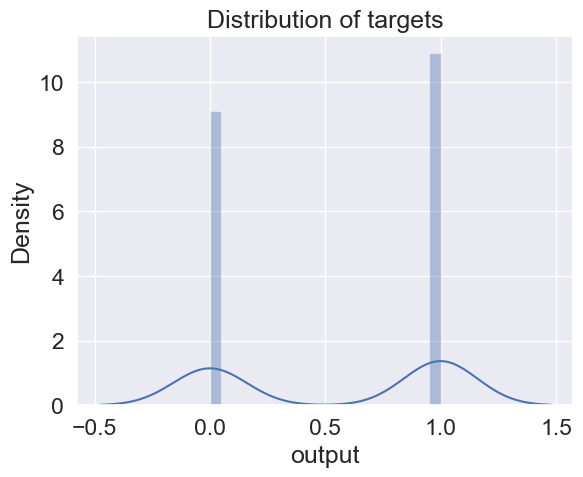

In [50]:

# Visualize the distribution of the rating column
sns.distplot(df['output'], bins = 20)
plt.title('Distribution of targets')
plt.show()

In [51]:
# la correlation entre les variables 
df.corr()

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
output   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trtbps   -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalachh  0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exng     -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slp       0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
caa      -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thall    -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
output    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

             thall    output  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trtbps    0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalachh -0.096439  0.421741  
exng      0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slp      -0.104764  0.345877  
caa       0.151832 -0.391724  
thall     1.000000 -0.344029  
output   -0.344029  1.000000

In [52]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

In [53]:
df.drop('fbs', axis=1, inplace=True)

In [54]:
df

age  sex  cp  trtbps  chol  restecg  thalachh  exng  oldpeak  slp  caa  \
0     63    1   3     145   233        0       150     0      2.3    0    0   
1     37    1   2     130   250        1       187     0      3.5    0    0   
2     41    0   1     130   204        0       172     0      1.4    2    0   
3     56    1   1     120   236        1       178     0      0.8    2    0   
4     57    0   0     120   354        1       163     1      0.6    2    0   
..   ...  ...  ..     ...   ...      ...       ...   ...      ...  ...  ...   
298   57    0   0     140   241        1       123     1      0.2    1    0   
299   45    1   3     110   264        1       132     0      1.2    1    0   
300   68    1   0     144   193        1       141     0      3.4    1    2   
301   57    1   0     130   131        1       115     1      1.2    1    1   
302   57    0   1     130   236        0       174     0      0.0    1    1   

     thall  output  
0        1       1  
1        2       1  
2        2       1  
3        2       1  
4        2       1  
..     ...     ...  
298      3       0  
299      3       0  
300      3       0  
301      3       0  
302      2       0  

[303 rows x 13 columns]

# Sex Ratio in the Data

In [55]:
fig=px.histogram(df,
                 x="sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

# Distribution of Heart Diseases

In [56]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df, 
                 x="output",
                 color="sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

## 25% des femmes n'ont pas de crise cardiaque

In [57]:
24/96

0.25

## 75% des femmes ont une crise cardiaque

In [58]:
72/96

0.75

## 55% des hommes n'ont pas de crise cardiaque


In [59]:
114/207

0.5507246376811594

## 44% des hommes ont une crise cardiaque

In [60]:
93/207

0.4492753623188406

# Types of Chest Pain

In [61]:
fig=px.histogram(df,
                 x="cp",
                 color="sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

<Figure size 1500x1000 with 0 Axes>

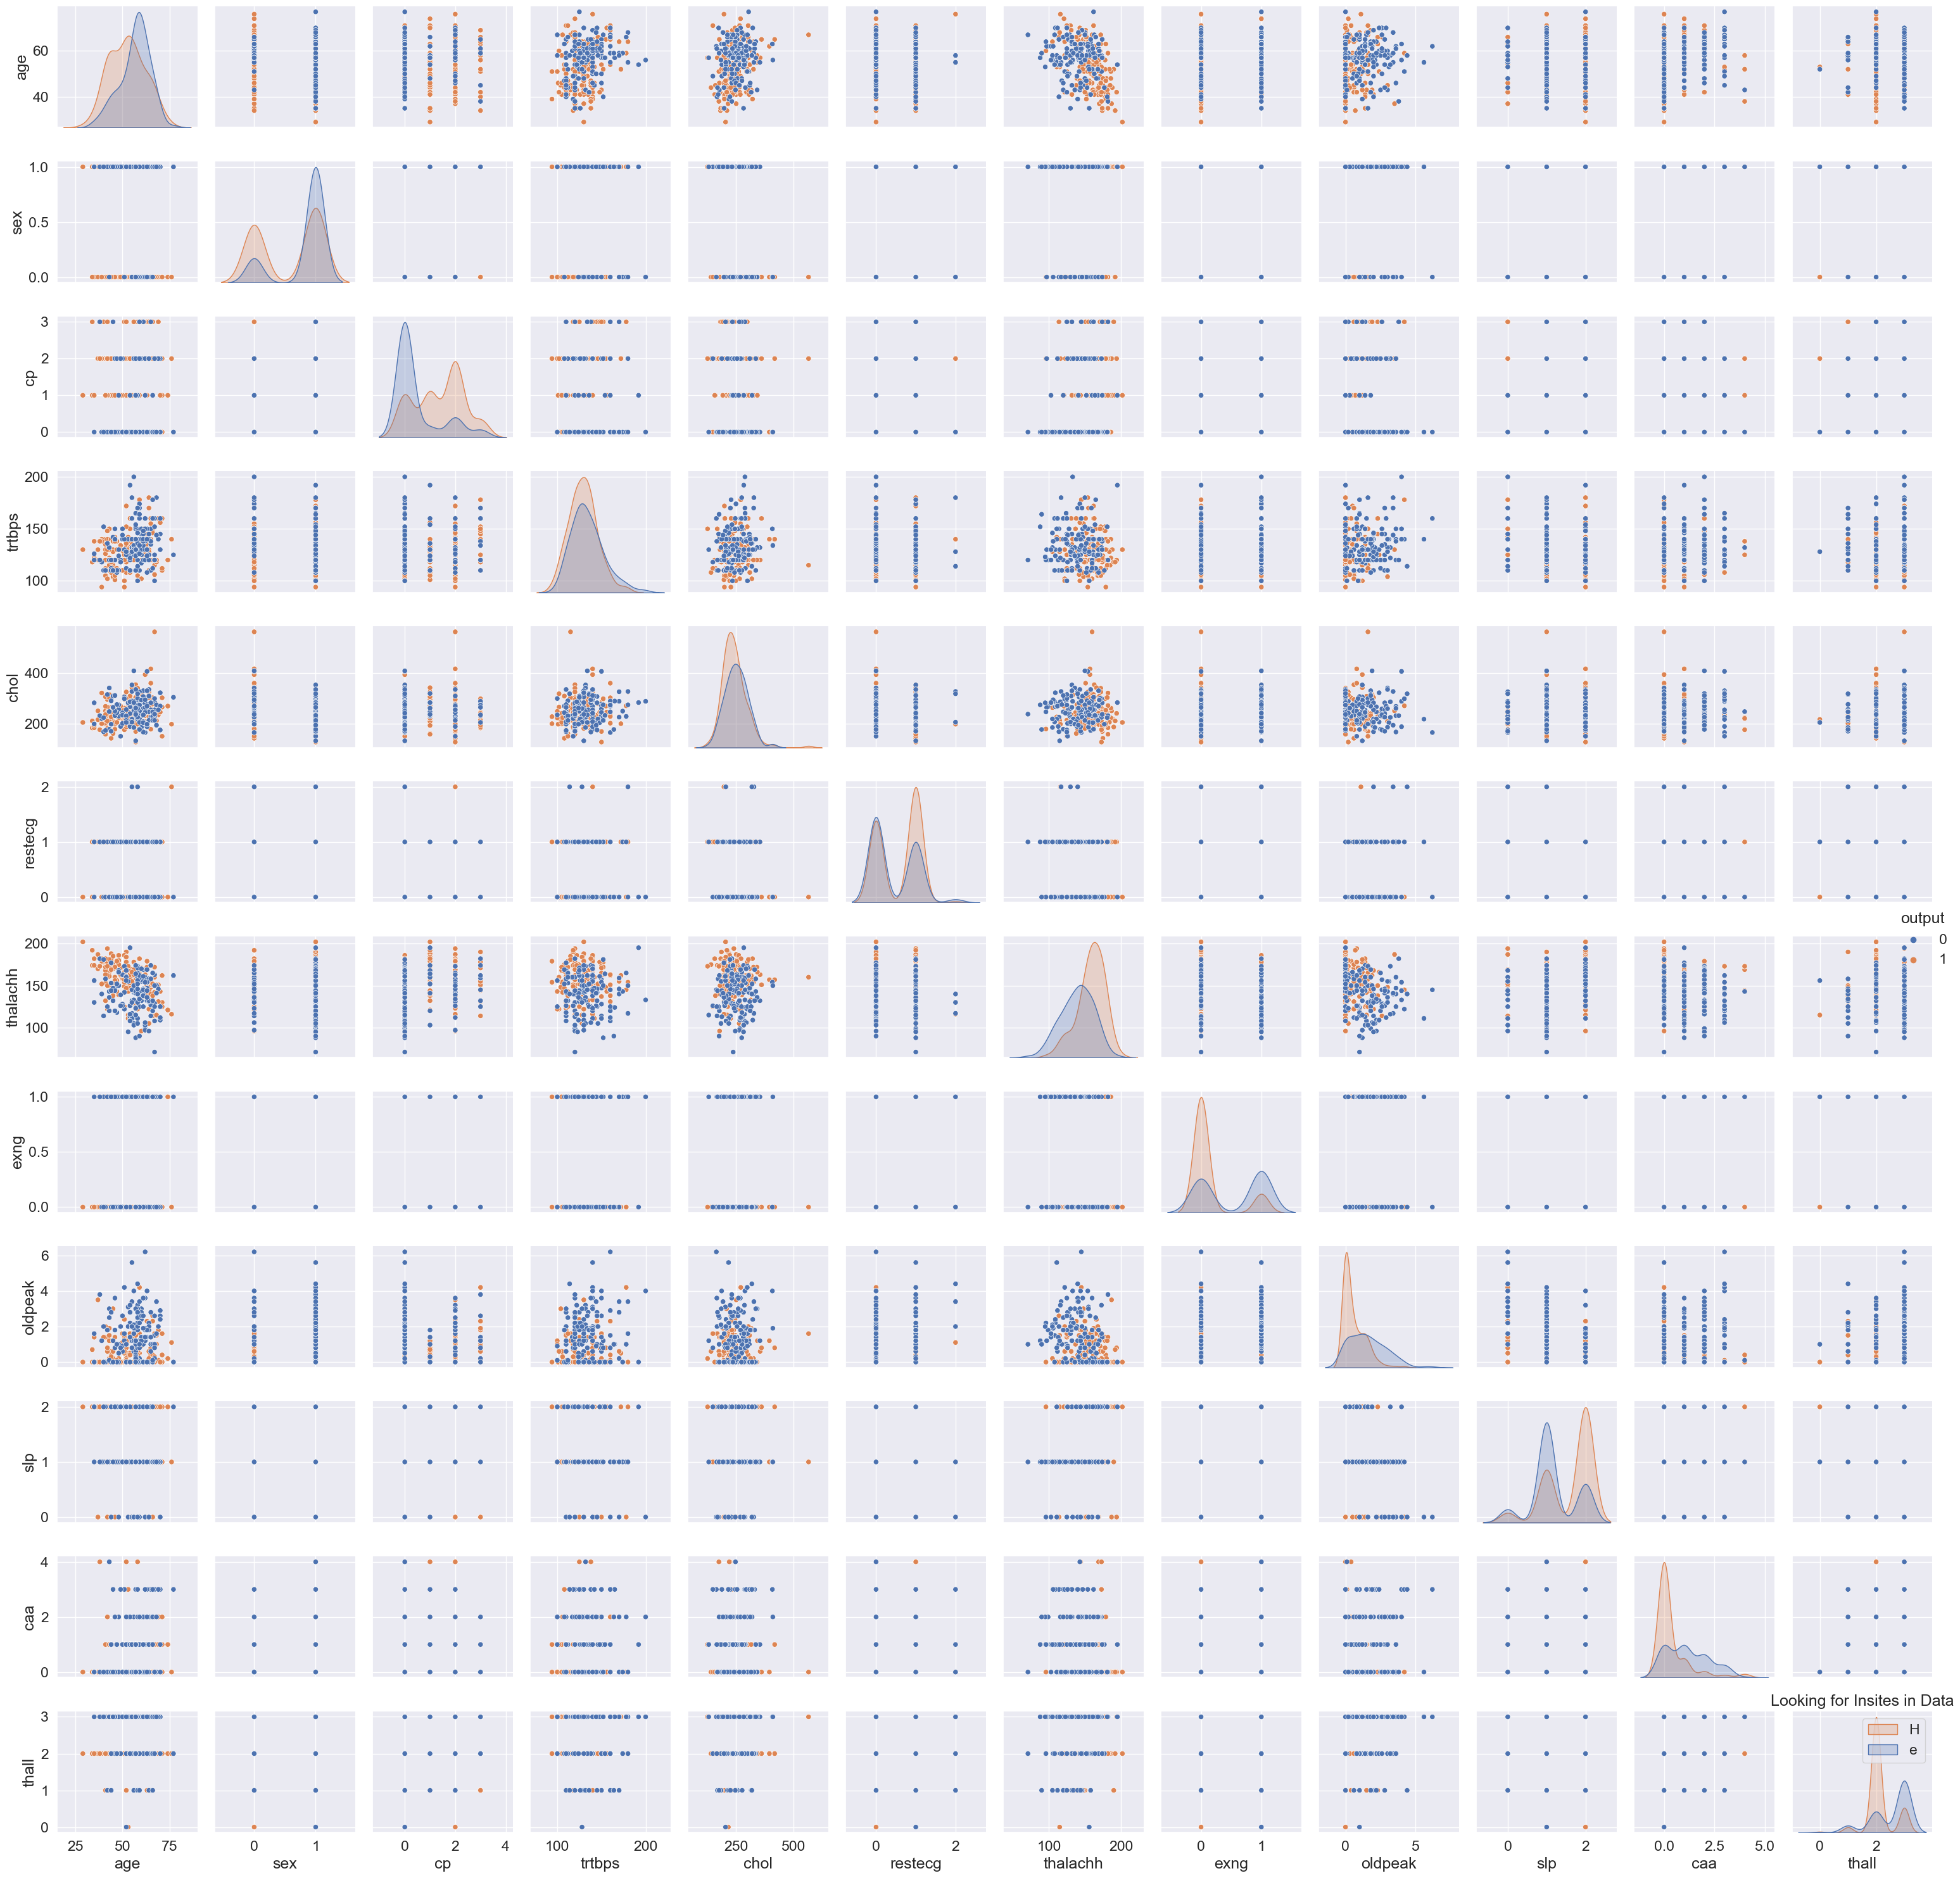

In [62]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="output")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()
plt.show()

# Distrubution of Age

In [63]:
fig=px.histogram(df,
                 x="age",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [64]:
fig = px.box(df,y="age",x="output",title=f"Distrubution of Age")
fig.show()

In [65]:
fig = px.box(df,y="oldpeak",x="output",title=f"oldpeak")
fig.show()

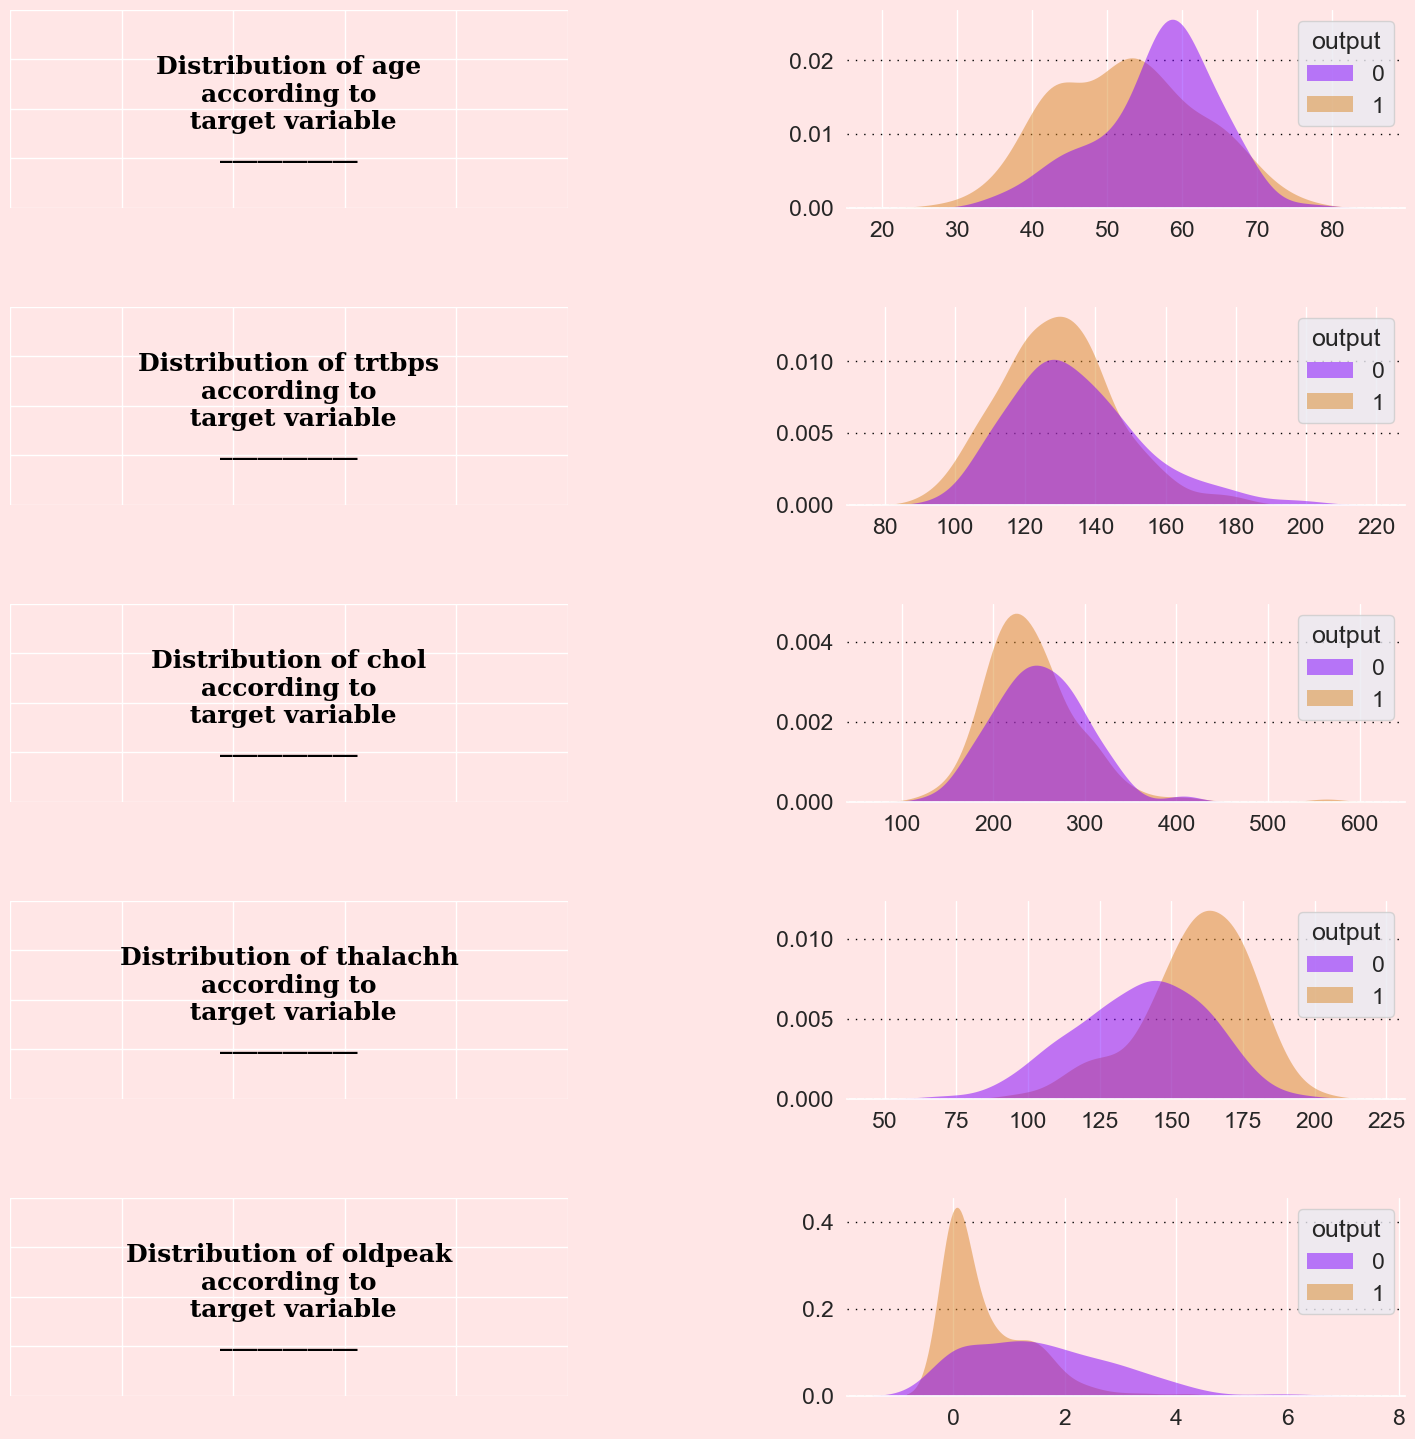

In [66]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")
# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)
# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")
# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)
# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")
# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)
# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")
# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)
# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
